In [71]:
import numpy as np
import os
os.chdir(os.path.join('..', 'src'))
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from helper_functions import dense_from_acdc
from PIL import Image

data_dir = os.path.join('..', 'raw_data')

In [14]:
img_paths = glob(os.path.join(data_dir, '*_img.npz'))
mask_paths = glob(os.path.join(data_dir, '*_mask.npz'))
img_paths, mask_paths

(['..\\raw_data\\File01_img.npz',
  '..\\raw_data\\File02_img.npz',
  '..\\raw_data\\File03_img.npz',
  '..\\raw_data\\File04_img.npz'],
 ['..\\raw_data\\File01_mask.npz',
  '..\\raw_data\\File02_mask.npz',
  '..\\raw_data\\File03_mask.npz',
  '..\\raw_data\\File04_mask.npz'])

In [11]:
img_data = [np.load(img_p)['arr_0'] for img_p in img_paths]
mask_data = [np.load(mask_p)['arr_0'] for mask_p in mask_paths]

In [13]:
[i.shape for i in img_data], [i.shape for i in mask_data] 

([(201, 410, 366), (241, 172, 166), (201, 397, 423), (241, 213, 170)],
 [(201, 410, 366), (241, 172, 166), (201, 397, 423), (241, 213, 170)])

In [34]:
pil_ob = Image.fromarray(dense_mask)

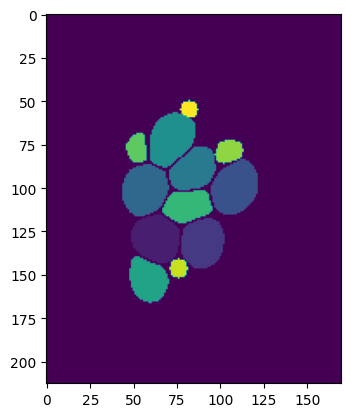

In [31]:
plt.imshow(dense_mask)

In [88]:
for file_idx, (img, mask) in enumerate(zip(img_data, mask_data)):
    data_path = os.path.join('..', 'data')
    save_path = os.path.join(data_path, 're_train') if file_idx < 2 else  os.path.join(data_path, 're_test') 
    for save_idx, frame_idx in enumerate(range(0, len(img)-1, int(len(img)//5))):
        image = img[frame_idx]
        rgb_shape = (*image.shape, 3)
        rgb_image = np.zeros(rgb_shape)
        rgb_image[:,:,1] = image
        rgb_image = (((rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())) * 255.9).astype(np.uint8)
        rgb_image = Image.fromarray(rgb_image)
        rgb_image.save(os.path.join(save_path, f'File{file_idx:02d}_{save_idx:02d}_img.png'))
        
        dense_mask = dense_from_acdc(mask[frame_idx])
        dense_mask = (((dense_mask - dense_mask.min()) / (dense_mask.max() - dense_mask.min())) * 255.9).astype(np.uint8)
        mask_img = Image.fromarray(dense_mask)
        mask_img.save(os.path.join(save_path, f'File{file_idx:02d}_{save_idx:02d}_masks.png'))